# Выбор места бурения

## Введение

Предоставлены пробы нефти в трёх регионах. Характеристики скважин уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль.

## Цель

Исходя из предоставленных данных, необходимо выбрать место для бурения новой скважины, где дабыча принесет максимальную прибыль.

## Импорты

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
from scipy import stats as st

RND = np.random.RandomState(12345)
BOOTHSTRP_SAMPLS = 1000
BUDGET = 10**10
INCOME_ONE_PROD = 450000
POINTS = 500
BEST_POINTS = 200

# Подготовка данных

## Загрузка данных

In [3]:
try:
    df_0 = pd.read_csv('geo_data_0.csv')
    df_1 = pd.read_csv('geo_data_1.csv')
    df_2 = pd.read_csv('geo_data_2.csv')
except:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')
regs = [df_0, df_1, df_2]

## Общая информация о данных

In [4]:
for _ in regs:
    display(_.head())
    _.info()
    print('*' * 30)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
******************************


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
******************************


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
******************************


**Пропуски**

In [5]:
for _ in regs:
    print(_.isnull().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


**Наличие дубликатов**

In [6]:
for _ in regs:
    print(_.duplicated().sum())

0
0
0


**Повторы ID**

In [7]:
for _ in regs:
    print(len(_['id'].unique()))

99990
99996
99996


## Удаляем дубликаты ID и столбец ID

In [8]:
df_0 = df_0.drop_duplicates(subset=['id']).reset_index(drop=True)
df_0 = df_0.drop(['id'], axis=1)
df_1 = df_1.drop_duplicates(subset=['id']).reset_index(drop=True)
df_1 = df_1.drop(['id'], axis=1)
df_2 = df_2.drop_duplicates(subset=['id']).reset_index(drop=True)
df_2 = df_2.drop(['id'], axis=1)

## Корреляция

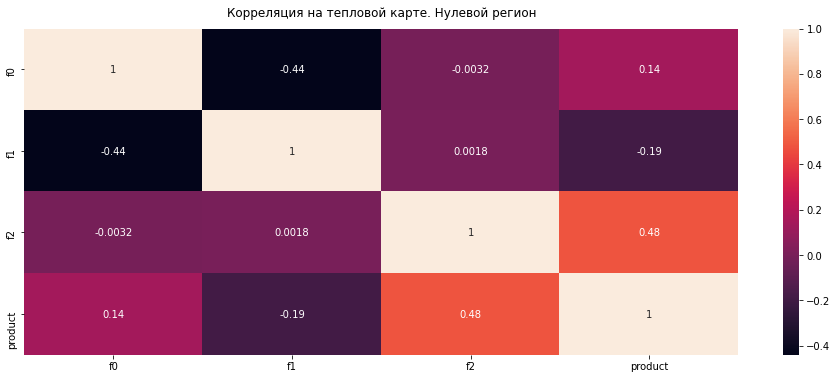

In [9]:
plt.figure(figsize=(16, 6)) 

heatmap = sns.heatmap(df_0.corr(), annot=True) 
heatmap.set_title('Корреляция на тепловой карте. Нулевой регион', fontdict={'fontsize':12}, pad=12);

Видна не значительная прямая и обратная корреляция признаков F0, F2 и Product

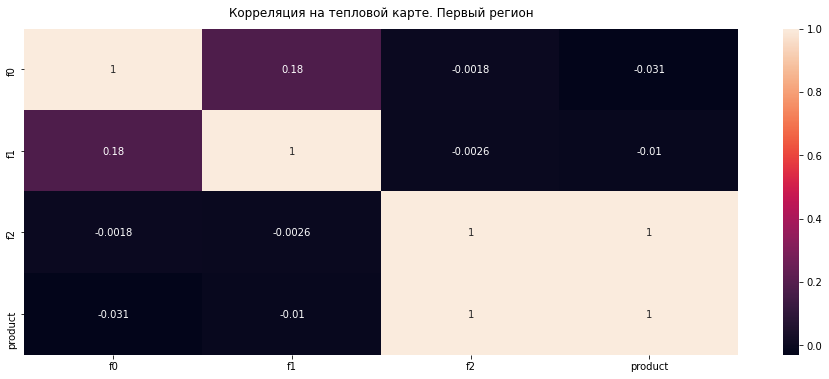

In [10]:
plt.figure(figsize=(16, 6)) 

heatmap = sns.heatmap(df_1.corr(), annot=True) 
heatmap.set_title('Корреляция на тепловой карте. Первый регион', fontdict={'fontsize':12}, pad=12);

В первом регионе интересная картина. У F2 и Product почти стапроцентная корреляция

In [11]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182279,-0.001810,-0.030523
f1,0.182279,1.000000,-0.002594,-0.010154
f2,-0.001810,-0.002594,1.000000,0.999397
product,-0.030523,-0.010154,0.999397,1.000000


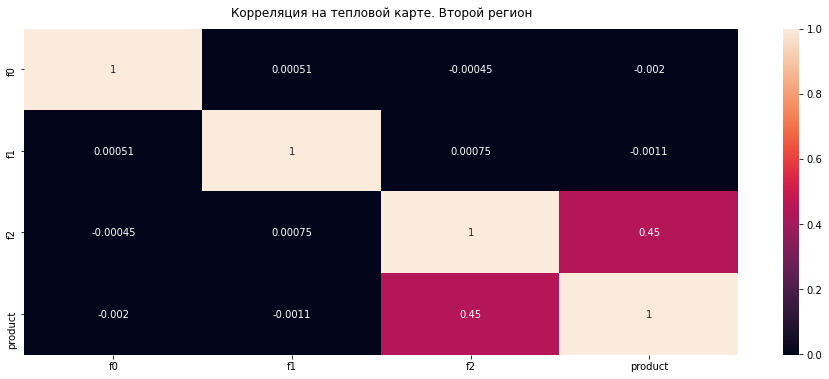

In [12]:
plt.figure(figsize=(16, 6)) 

heatmap = sns.heatmap(df_2.corr(), annot=True) 
heatmap.set_title('Корреляция на тепловой карте. Второй регион', fontdict={'fontsize':12}, pad=12);

Во втором регионе есть корреляция Product и F2, остальные признаки по видимому вообще не влияют.

## График объемов запасов сырья по регионам

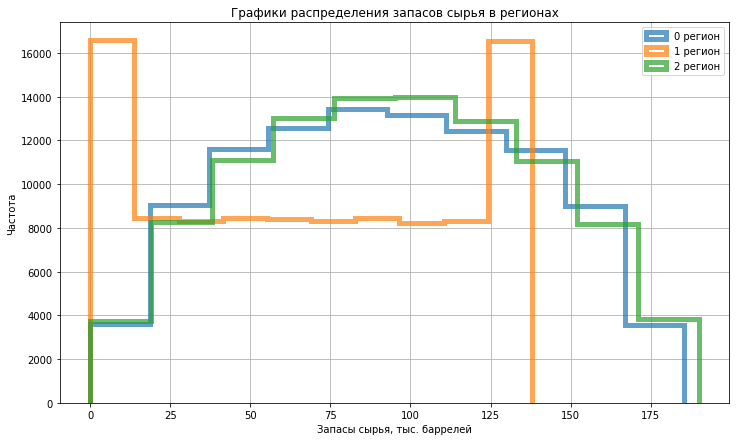

In [13]:
plt.title('Графики распределения запасов сырья в регионах')
ax=df_0['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, 
                          alpha=0.7, histtype='step', linewidth=5, label='0 регион')
ax1=df_1['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, 
                           alpha=0.7,histtype='step', linewidth=5, label='1 регион', ax=ax)
df_2['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, 
                       alpha=0.7,histtype='step', linewidth=5, label='2 регион', ax=ax1)
plt.xlabel('Запасы сырья, тыс. баррелей')
plt.ylabel('Частота')
plt.show()

Для первого региона кривая сильно отличается от остальных. На данных корреляции для этого региона тоже была видна сильная зависимость. Это может играть большое значение при анализе рентабильности и отражаться на предсказаниях модели для этого региона.

# Обучение и проверка модели

## Разбиваем на `train` и `valid` в соотношении 75:25

In [14]:
def train_valid (data):
    features = data.drop(['product'], axis = 1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=.25, random_state=RND)
    data_separation = pd.DataFrame({'name': ['features_train',
                                         'features_valid'],
                                    'parts_data_frame': [
                                        features_train.shape[0],
                                        features_valid.shape[0]]})
                                    
    data_separation = data_separation.set_index('name')
    data_separation.plot(kind='pie', y='parts_data_frame', autopct='%1.0f%%', title='соотношение 75:25')
    return features_train, features_valid, target_train, target_valid 

**Нулевой регион**

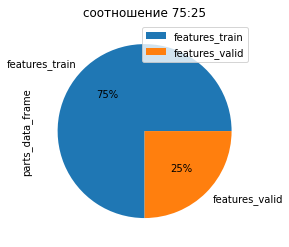

In [15]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_valid(df_0)

**Первый регион**

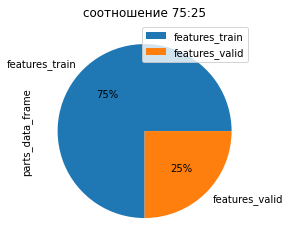

In [16]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_valid(df_1)

**Второй регион**

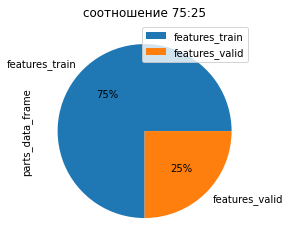

In [17]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_valid(df_2)

## Обучение модели

In [18]:
def prediction_reg(features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    return pd.Series(model.predict(features_valid)), target_valid

In [19]:
predicted_0, target_0 = prediction_reg(features_train_0, features_valid_0, target_train_0, target_valid_0)
predicted_1, target_1 = prediction_reg(features_train_1, features_valid_1, target_train_1, target_valid_1)
predicted_2, target_2 = prediction_reg(features_train_2, features_valid_2, target_train_2, target_valid_2)

## RMSE модели

In [20]:
def show_rmse (target, predictions):
    mse = mean_squared_error(target, predictions)
    rmse = mse ** 0.5
    predictions_mean = predictions.mean()
    print('Средний запас сырья, тыс. баррелей:', predictions_mean)
    print('RMSE:', rmse)
    return predictions_mean, rmse

In [21]:
print('Регион 0')
predictions_mean_0, rmse_0 = show_rmse(target_0, predicted_0)

Регион 0
Средний запас сырья, тыс. баррелей: 92.78915638280621
RMSE: 37.853527328872964


In [22]:
print('Регион 1')
predictions_mean_1, rmse_1 = show_rmse(target_1, predicted_1)

Регион 1
Средний запас сырья, тыс. баррелей: 68.95746560835222
RMSE: 0.8947795612492053


In [23]:
print('Регион 2')
predictions_mean_2, rmse_2 = show_rmse(target_2, predicted_2)

Регион 2
Средний запас сырья, тыс. баррелей: 95.07949668343952
RMSE: 40.04155743522127


In [24]:
final_table = pd.DataFrame(index=['средний запас предсказанного сырья','RMSE модели'], 
                               columns=['регион 0','регион 1','регион 2'])
final_table['регион 0'] = predictions_mean_0, rmse_0
final_table['регион 1'] = predictions_mean_1, rmse_1
final_table['регион 2'] = predictions_mean_2, rmse_2
final_table

,регион 0,регион 1,регион 2
средний запас предсказанного сырья,92.789156,68.957466,95.079497
RMSE модели,37.853527,0.894780,40.041557


**Вывод:**<br>
Проведено обучение моделей и проверенно качество RMSE, среднеквадратичной ошибки.
Из общей картины регионов выделяется региион 1. Тут, самые маленькие запасы сырья и самая низкая ошибка предсказаний.

# Подготовка к расчету прибыли

In [25]:
BUDGET_FOR_ONE = BUDGET / BEST_POINTS
min_volume_product = BUDGET_FOR_ONE / INCOME_ONE_PROD

In [26]:
print('Объём сырья скважины для безубыточной разработки \
должен составлять не менее: %.2f'%min_volume_product, 'тыс.баррелей')

Объём сырья скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей


In [27]:
print('Бюджет на разработку одной скважины:', BUDGET_FOR_ONE/1000000,'млн.руб')

Бюджет на разработку одной скважины: 50.0 млн.руб


In [28]:
print("Средний истинный запас сырья в регионах, тыс. баррелей:")
print()
count = 0
targets = [predictions_mean_0, predictions_mean_1, predictions_mean_2]
for target in targets:
    print('Регион ', count,': ',  target)
    count += 1
print()
print('Для разработки требуется не менее: %.2f'%min_volume_product, 'тыс.баррелей')

Средний истинный запас сырья в регионах, тыс. баррелей:

Регион  0 :  92.78915638280621
Регион  1 :  68.95746560835222
Регион  2 :  95.07949668343952

Для разработки требуется не менее: 111.11 тыс.баррелей


**Исходя из среднего запаса сырья в региона, разработка в любом из них будет убыточной.**

## Соотношение полученного среднего объема с запасом в каждом ренионе 

In [29]:
df_0['profit']=(df_0['product']*(INCOME_ONE_PROD/1000)).round(2) # profit, тыс.руб
df_0.head()

,f0,f1,f2,product,profit
0,0.705745,-0.497823,1.221170,105.280062,47376.03
1,1.334711,-0.340164,4.365080,73.037750,32866.99
2,1.022732,0.151990,1.419926,85.265647,38369.54
3,-0.032172,0.139033,2.978566,168.620776,75879.35
4,1.988431,0.155413,4.751769,154.036647,69316.49


In [30]:
df_1['profit']=(df_1['product']*(INCOME_ONE_PROD/1000)).round(2) # profit, тыс.руб
df_1.head()

,f0,f1,f2,product,profit
0,-15.001348,-8.276000,-0.005876,3.179103,1430.60
1,14.272088,-3.475083,0.999183,26.953261,12128.97
2,6.263187,-5.948386,5.001160,134.766305,60644.84
3,-13.081196,-11.506057,4.999415,137.945408,62075.43
4,12.702195,-8.147433,5.004363,134.766305,60644.84


In [31]:
df_2['profit'] = (df_2['product'] * (INCOME_ONE_PROD / 1000)).round(2) # profit, тыс.руб
df_2.head()

,f0,f1,f2,product,profit
0,-1.146987,0.963328,-0.828965,27.758673,12491.40
1,0.262778,0.269839,-2.530187,56.069697,25231.36
2,0.194587,0.289035,-5.586433,62.871910,28292.36
3,2.236060,-0.553760,0.930038,114.572842,51557.78
4,-0.515993,1.716266,5.899011,149.600746,67320.34


## Возврат на инвестиции RIO

In [32]:
budget_for_one_k = BUDGET_FOR_ONE/1000

**Регион 0**

In [33]:
df_0['roi_%']=((df_0['profit']-budget_for_one_k)/budget_for_one_k*100).round(2)
df_0.head()

,f0,f1,f2,product,profit,roi_%
0,0.705745,-0.497823,1.221170,105.280062,47376.03,-5.25
1,1.334711,-0.340164,4.365080,73.037750,32866.99,-34.27
2,1.022732,0.151990,1.419926,85.265647,38369.54,-23.26
3,-0.032172,0.139033,2.978566,168.620776,75879.35,51.76
4,1.988431,0.155413,4.751769,154.036647,69316.49,38.63


In [34]:
print('Разница объёма сырья для безубыточной разработки скважины относительно\
среднего значения по 1 региону составляет: {:.2%}'.format(predictions_mean_0 / min_volume_product - 1 ))
print('Или не хватает {:.2f} тыс.баррелей'.format(min_volume_product - predictions_mean_0))

Разница объёма сырья для безубыточной разработки скважины относительносреднего значения по 1 региону составляет: -16.49%
Или не хватает 18.32 тыс.баррелей


**Регион 1**

In [35]:
df_1['roi_%']=((df_1['profit']-budget_for_one_k)/budget_for_one_k*100).round(2)
df_1.head()

,f0,f1,f2,product,profit,roi_%
0,-15.001348,-8.276000,-0.005876,3.179103,1430.60,-97.14
1,14.272088,-3.475083,0.999183,26.953261,12128.97,-75.74
2,6.263187,-5.948386,5.001160,134.766305,60644.84,21.29
3,-13.081196,-11.506057,4.999415,137.945408,62075.43,24.15
4,12.702195,-8.147433,5.004363,134.766305,60644.84,21.29


In [36]:
print('Разница объёма сырья для безубыточной разработки скважины относительно\
среднего значения по 1 региону составляет: {:.2%}'.format(predictions_mean_1 / min_volume_product - 1 ))
print('Или не хватает {:.2f} тыс.баррелей'.format(min_volume_product - predictions_mean_1))

Разница объёма сырья для безубыточной разработки скважины относительносреднего значения по 1 региону составляет: -37.94%
Или не хватает 42.15 тыс.баррелей


**Регион 2**

In [37]:
df_2['roi_%']=((df_2['profit']-budget_for_one_k)/budget_for_one_k*100).round(2)
df_2.head()

,f0,f1,f2,product,profit,roi_%
0,-1.146987,0.963328,-0.828965,27.758673,12491.40,-75.02
1,0.262778,0.269839,-2.530187,56.069697,25231.36,-49.54
2,0.194587,0.289035,-5.586433,62.871910,28292.36,-43.42
3,2.236060,-0.553760,0.930038,114.572842,51557.78,3.12
4,-0.515993,1.716266,5.899011,149.600746,67320.34,34.64


In [38]:
print('Разница объёма сырья для безубыточной разработки скважины относительно\
среднего значения по 1 региону составляет: {:.2%}'.format(predictions_mean_2 / min_volume_product - 1 ))
print('Или не хватает {:.2f} тыс.баррелей'.format(min_volume_product - predictions_mean_2))

Разница объёма сырья для безубыточной разработки скважины относительносреднего значения по 1 региону составляет: -14.43%
Или не хватает 16.03 тыс.баррелей


**Вывод**<br>
Исходя из полученных данных очевидно, что среднее количество запасов сырья по регионам недостаточное для окупаемости разработки.<br>
Нужно выбрать скважины с максимальными запасами.

# Расчет прибыли по выбранным скважинам и предсказаниям модели

In [39]:
def profit_for_best(predict, target, count):
    # Привязка индексов и к предсказаниям и сортировка
    probs_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_max = probs_sorted[:count].sum() # Сумма по лучшим скважинам
    
    profit_pred = (selected_max * INCOME_ONE_PROD) - BUDGET
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max)
    print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit_pred/100000)) 
   
    return selected_max

In [40]:
selected_max = []

**Регион 0**

In [41]:
selected_max.append(profit_for_best(predicted_0, target_0, BEST_POINTS))

Суммарный запас сырья в 200 лучших скважинах составит: 29020.12 тыс.баррелей
Прибыль для полученного объёма сырья составит 30590.55 млн.рублей


**Регион 1**

In [42]:
selected_max.append(profit_for_best(predicted_1, target_1, BEST_POINTS))

Суммарный запас сырья в 200 лучших скважинах составит: 27648.78 тыс.баррелей
Прибыль для полученного объёма сырья составит 24419.52 млн.рублей


**Регион 2**

In [43]:
selected_max.append(profit_for_best(predicted_2, target_2, BEST_POINTS))

Суммарный запас сырья в 200 лучших скважинах составит: 28041.72 тыс.баррелей
Прибыль для полученного объёма сырья составит 26187.72 млн.рублей


**Вывод**<br>
Все три региона потенциально прибыльные, если вести разработку не по всем подряд скважинам, а только по самым лучшим.

# Расчет прибыли и рисков

In [44]:
def profit(target, probabilities):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:BEST_POINTS]
    
    mlrd = 1000000000
    return ((INCOME_ONE_PROD * selected.sum()) - BUDGET) / mlrd #, max_volume

In [45]:
def bootstrap (target, predictions):
    values = []
    for i in range(BOOTHSTRP_SAMPLS):
        target_subsample = target.reset_index(drop=True).sample(n=POINTS, replace=True, random_state=RND)
        probs_subsample = predictions[target_subsample.index]
        pr = profit(target_subsample, probs_subsample)
        values.append(pr)
    values = pd.Series(values)
    mean = values.mean() * 1000
    low = values.quantile(0.025) * 1000
    high = values.quantile(0.975) * 1000
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(8,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    risk = (values < 0).mean() * 100
   
    
    print("Средняя выручка: {:.2f} млн.руб".format(mean))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.
          format(low, high))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". 
          format((confidence_interval[0]*1000),(confidence_interval[1]*1000)))
    print("Риск убытка: {:.2f} %".format(risk))
    #print(max_volume)
    return mean, risk

### Распределение прибыли Регион 0

In [46]:
mean = []
risk = []

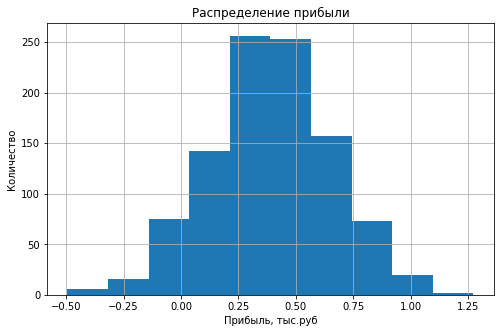

Средняя выручка: 389.04 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -112.97 млн.руб до: 894.00 млн.руб
95%-ый доверительный интервал: от 372.70 млн.руб до 405.39 млн.руб
Риск убытка: 7.40 %


In [47]:
mean1, risk1 = bootstrap(target_0, predicted_0)
mean.append(mean1)
risk.append(risk1)

### Распределение прибыли Регион 1

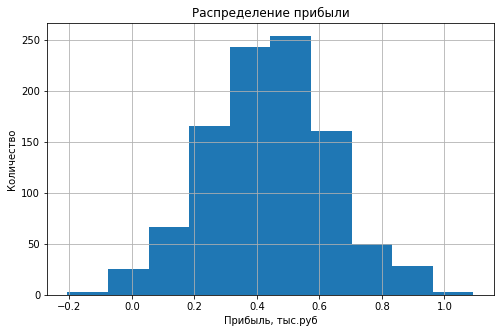

Средняя выручка: 439.07 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 33.06 млн.руб до: 850.15 млн.руб
95%-ый доверительный интервал: от 426.76 млн.руб до 451.39 млн.руб
Риск убытка: 1.30 %


In [48]:
mean1, risk1 = bootstrap(target_1, predicted_1)
mean.append(mean1)
risk.append(risk1)

### Распределение прибыли Регион 2

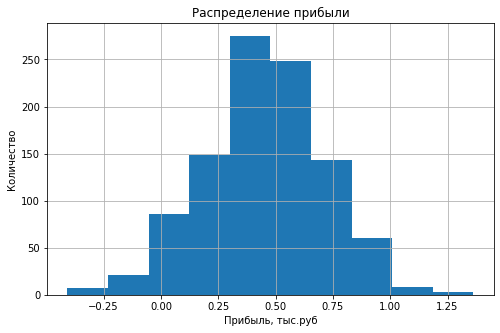

Средняя выручка: 450.22 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -62.39 млн.руб до: 943.66 млн.руб
95%-ый доверительный интервал: от 433.97 млн.руб до 466.48 млн.руб
Риск убытка: 4.60 %


In [49]:
mean1, risk1 = bootstrap(target_2, predicted_2)
mean.append(mean1)
risk.append(risk1)

## Выбор региона

* оставим регионы, в которых вероятность убытков меньше 2.5%
* cреди них выберем регион с наибольшей средней прибылью
* cравним среднюю прибыль, вероятность убытка и суммарный запас сырья трёх представленных регионов в таблице

In [50]:
final_table = None
final_table = pd.DataFrame(index=['Средняя прибыль в регионе, млн.руб',\
                                  'Суммарный запас сырья, тыс.баррелей','Вероятность убытка, %'], 
                           columns=['Регион 0','Регион 1','Регион 2'])
final_table.loc['Средняя прибыль в регионе, млн.руб', ] = mean
final_table.loc['Суммарный запас сырья, тыс.баррелей', ] = selected_max
final_table.loc['Вероятность убытка, %', ] = risk
final_table

,Регион 0,Регион 1,Регион 2
"Средняя прибыль в регионе, млн.руб",389.044489,439.072389,450.224714
"Суммарный запас сырья, тыс.баррелей",29020.12193,27648.781993,28041.716206
"Вероятность убытка, %",7.4,1.3,4.6


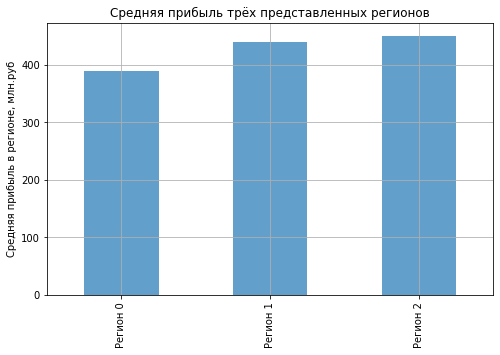

In [51]:
final_table.astype('float').iloc[0,:].plot(kind="bar", figsize=(8,5), grid=True, alpha=0.7, subplots=True)
plt.title('Средняя прибыль трёх представленных регионов')
plt.ylabel('Средняя прибыль в регионе, млн.руб')
plt.show()

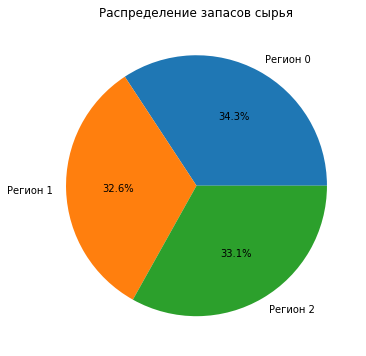

In [52]:
final_table.astype('float').iloc[1,:].plot(kind='pie', figsize=(6,6),autopct='%1.1f%%', subplots=True)
plt.title('Распределение запасов сырья')
plt.ylabel('')
plt.show()

**Вывод**
Согласно распределению среднего значения прибыли с региона, самым прибыльным оказался 1 -й регион.<br>
Два других региона не прошли отбор по минимально допустимому порогу убытка в 2,5%. Таким образом не смотря на сравнительно меньшие запасы сырья, по сравнению с другими регионами, средняя доходность со скважин во втором регионе прогнозируется выше других.

# Общий вывод

Проведено исследование по скважинам трех регионов, в каждом из которых были данные о запасах сырья (на 10 тыс.скважин).<br>


При первом знакомстве с данными обнаружено, что средний запас ресурсов по регионам недостаточен даже для окупаемости вложений на разработку. Разработка во всех регионах не рентабельна.<br>

В последствии была обучена модель и выполнены предсказания при помощи линейной регрессии, а так же применина технология bootstrap, с разделением каждого предсказанного значения прибыли по регионам на 1000 выборок.<br>

В результате получен доверительный интервал получения прибыли в 95%, при ограничении рисков убытка величиной менее 2,5%.<br>
На основе этих данных выбран перспективный регион для разработки 200 скважин.<br>

Таким образом не смотря на сравнительно меньшие предсказания по запасам сырья по сравнению с другими регионами наиболее перспективным оказался Регион 1, с минимальными рисками убытка и превышающей остальные регионы средней прибылью.